In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('iris1.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
X = data.iloc[:,2:4].values
Y = data.iloc[:,4].values

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [5]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.25,random_state = 5)

In [6]:
# sc = StandardScaler()
# train_x = sc.fit_transform(train_x)
# test_x = sc.fit_transform(test_x)
Le = LabelEncoder()
train_y = Le.fit_transform(train_y)
test_y = Le.fit_transform(test_y)

In [7]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [8]:
dtc = DecisionTreeClassifier(criterion="entropy")

In [9]:
dtc.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
pred_y = dtc.predict(test_x)
pred_y

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [12]:
mat = confusion_matrix(test_y,pred_y)
mat

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  1, 11]], dtype=int64)

In [13]:
from mlxtend.plotting import plot_confusion_matrix,plot_decision_regions

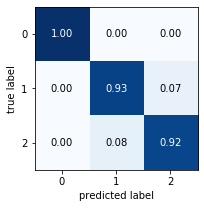

In [14]:
plot_confusion_matrix(mat,figsize=(3,3),show_absolute=False,show_normed =True)
plt.show()
#class_names=['setosa'=0,'versicolor'=1,'virginica'=2]

In [15]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [16]:
accuracy_score(test_y,pred_y)

0.9473684210526315

# DecisionTree Visulization part

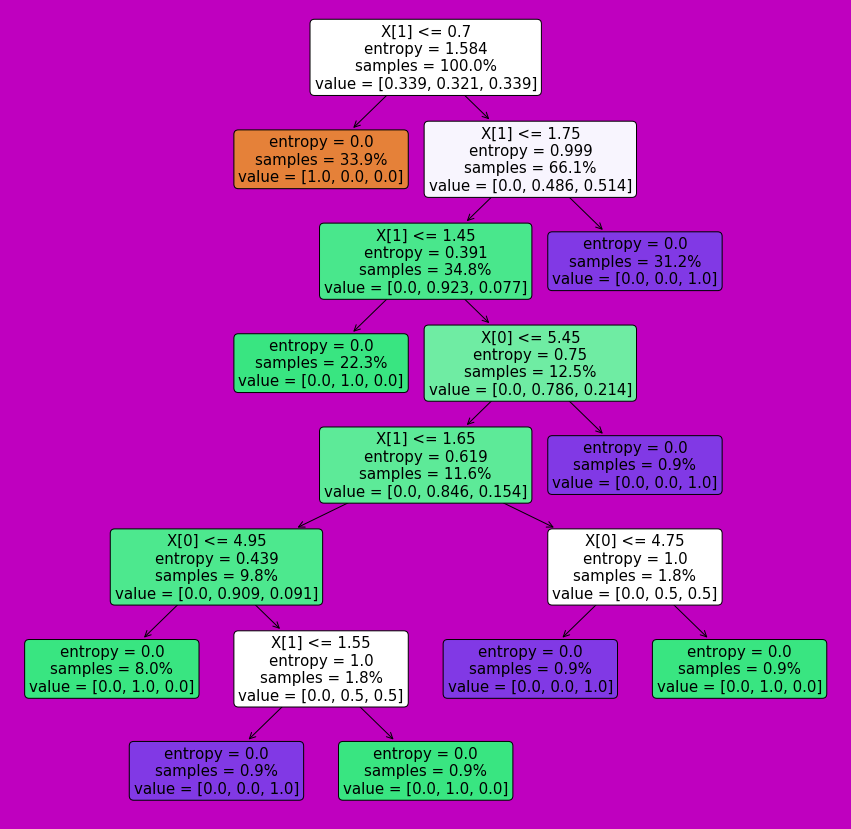

In [17]:
plt.figure(figsize=(15,15),facecolor='m',edgecolor="red")
plot_tree(dtc.fit(train_x,train_y),rotate=True,rounded=True,fontsize=15,node_ids=False, proportion=True,precision=3,filled=True)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


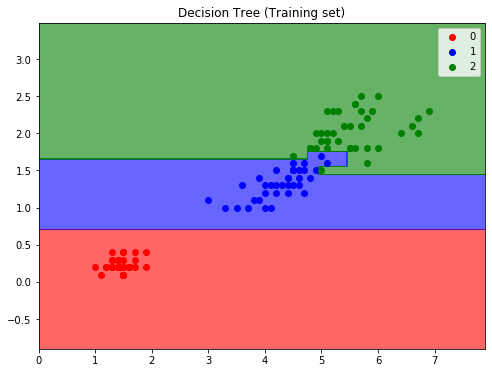

In [18]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,6))
x_set,y_set = train_x,train_y
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step = 0.01),np.arange(start = x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2,dtc.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.60,cmap = ListedColormap(("red",'blue','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],c = ListedColormap(("red",'blue','green'))(i),label=j)
plt.title('Decision Tree (Training set)')
plt.legend()
plt.show()
# ['setosa'=0,'versicolor'=1,'virginica'=2]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


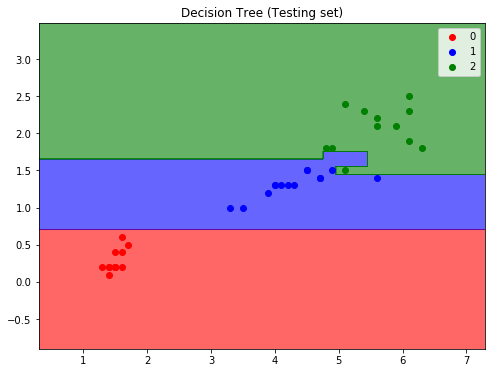

In [19]:
plt.figure(figsize=(8,6))
x_set,y_set = test_x,pred_y
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step = 0.01),np.arange(start = x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2,dtc.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.60,cmap = ListedColormap(("red",'blue','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],c = ListedColormap(("red",'blue','green'))(i),label=j)
plt.title('Decision Tree (Testing set)')
plt.legend()
plt.show()

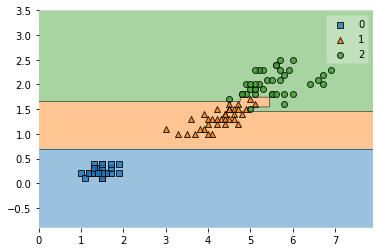

In [20]:
plot_decision_regions(train_x,train_y,dtc)